Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Выводы и рассуждения получились содержательными, их было интересно читать.
* Радует, что тебе удалось разобраться с техникой бутстрапа.
* Отлично, что доверительный интервал и риск убытков посчитаны верно.
* Я оставил несколько советов, надеюсь, что они будут учтены в будущих проектах.
* Редко, кто сдает эту работу с первого раза, молодец!
* Проект может быть зачтен, но я его отправлю назад, чтобы у тебя была возможность задать вопросы и внести правки, при желании. Однако, ты можешь просто вернуть проект в таком же виде и я его зачту.

### <font color='orange'>Общее впечатление (ревью 2)</font>
* Проект зачтен!
* Удачи в дальнейшем обучении и следующих работах!

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## 1 Загрузка и подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

In [2]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

Так как у нас три региона(три датасета) рассмотрим и обработаем каждый в отдельности.

### Регион №1

In [3]:
data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [6]:
data_0.duplicated().sum()

0

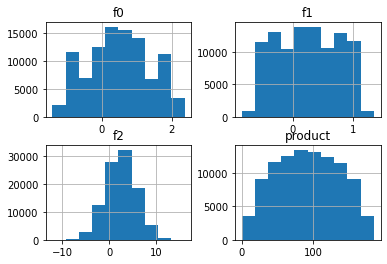

In [7]:
data_0.hist();

**В данных нет пропусков и дубликатов. Гистограммы показали, что в столбцах нет выбросов и все данные однородные, или подчинены нормальному распределению**

### Регион №2

In [8]:
data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [9]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


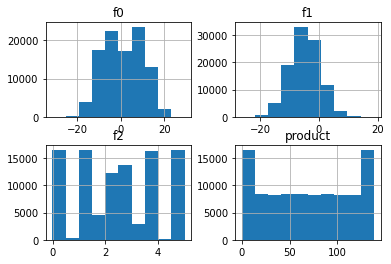

In [11]:
data_1.hist();

**В данных нет пропусков и дубликатов. Гистограммы показали, что в отличиче от первого региона, значения признака точек f3 распределена неравномерно, но большинство пиков ярко выражены. В столбце product пик в точке минимума, возможно запасы в скважинах в данном регионе не однородны, где-то нефти нет, где-то очень много**

### Регион №3

In [12]:
data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [13]:
data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


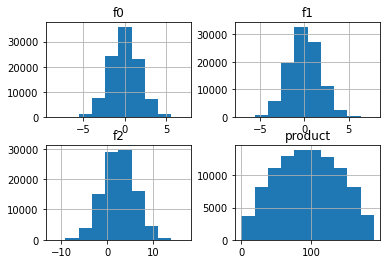

In [14]:
data_2.hist();

**В данных нет пропусков и дубликатов. Гистограммы показали, что в столбцах нет выбросов и все данные однородные, или подчинены нормальному распределению**

###  Вывод
Данные хорошего качества, без пропусков и дубликатов. По распределению значений первый и третий похожи. Второй регион имеет выбросы в показателях. 

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены и осмотрены корректно. Радует, что распределения были визуализированы!
</div>

##  2 Обучение и проверка модели

In [15]:
state = np.random.RandomState(12345) #фиксируем значение для упрощения кода в дальнейшем

**Запишем функцию, которая:**
- разбивает данные на обучающую и валидационную выборки в соотношении 75:25
- обучает модель и делает предсказание на валидационной выборке
- считает средний запас предсказанного сырья и RMSE модели


In [16]:
def training_verification (data):
    target=data['product']
    features=data.drop(['product','id'], axis=1)
    
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=state)
    
    model=LinearRegression()
    model.fit(features_train,target_train)
    predict=model.predict(features_valid) # предсказание на валидационной вывборке
    rmse = mean_squared_error(target_valid, predict)**0.5
    print('RMSE', rmse)
    print('Средний запас предсказанного сырья',predict.mean())
    return  (predict, target_valid.reset_index(drop=True))

In [17]:
print('region 1')
training_verification(data_0)

region 1
RMSE 37.5794217150813
Средний запас предсказанного сырья 92.59256778438035


(array([ 95.89495185,  77.57258261,  77.89263965, ...,  61.50983303,
        118.18039721, 118.16939229]),
 0         10.038645
 1        114.551489
 2        132.603635
 3        169.072125
 4        122.325180
             ...    
 24995    170.116726
 24996     93.632175
 24997    127.352259
 24998     99.782700
 24999    177.821022
 Name: product, Length: 25000, dtype: float64)

In [18]:
print('region 2')
training_verification(data_1)

region 2
RMSE 0.889736773768065
Средний запас предсказанного сырья 68.76995145799754


(array([54.23815201, 83.21787849,  2.97146723, ..., 83.90176874,
        -1.25947259, 26.16957032]),
 0         53.906522
 1         84.038886
 2          3.179103
 3         26.953261
 4        110.992147
             ...    
 24995     26.953261
 24996     80.859783
 24997     84.038886
 24998      0.000000
 24999     26.953261
 Name: product, Length: 25000, dtype: float64)

In [19]:
print('region 3')
training_verification(data_2)

region 3
RMSE 39.958042459521614
Средний запас предсказанного сырья 95.087528122523


(array([112.56187784,  69.46407333,  69.86622946, ..., 108.35059685,
        106.59141919, 124.86622084]),
 0         52.610856
 1         52.273440
 2         71.340473
 3        162.937918
 4        155.371552
             ...    
 24995     79.605182
 24996    189.685353
 24997    123.991040
 24998     79.004742
 24999    119.715838
 Name: product, Length: 25000, dtype: float64)

*Сохраняем предсказания и правильные ответы на валидационной выборке*

In [31]:
predict_0, validation_0 = training_verification(data_0)
predict_1, validation_1 = training_verification(data_1)
predict_2, validation_2 = training_verification(data_2)

RMSE 37.66554769247134
Средний запас предсказанного сырья 92.47032123424688
RMSE 0.8944120789112354
Средний запас предсказанного сырья 68.81707989784623
RMSE 40.03522428591007
Средний запас предсказанного сырья 94.87727860610981


### Вывод: 
**RMSE - метрика, которая определяет величину среднеквадратичной ошибки в предсказании модели.**

Модели обучены и проверены на качество предсказания. Исходя из полученных данный, можно заметить, что величина RMSE во втором регионе сильно отличается от двух других 40 против 1. Средний запас предсказанного сырья второго региона примерно на 20 тыс баррелей меньше первого и третьего 

<div class="alert alert-block alert-info">
<b>Совет: </b> Перед обучением линейных моделей желательно нормализовать признаки, при этом scaler должен быть обучен только на треине.
</div>

<div class="alert alert-block alert-success">
<b>Успех:</b> Модели обучены корректно. Радует, что ты активно используешь функции. Это помогает избежать дублирования кода, а значит уменьшает вероятность совершить ошибку/опечатку!
</div>

## 3 Подготовка к расчёту прибыли

**Все ключевые значения для расчётов сохраним в отдельных переменных.**

In [21]:
budget = 10**10  #Бюджет на разработку скважин в регионе — 10 млрд рублей. 
revenue_per_unit = 45 *10**4  #Доход с каждой единицы продукта составляет 450 тыс. рублей

Достаточный объем сырья (стоимость 1 точки / стоимость продукта)

In [22]:
coast_one_point = budget / 200 
print(coast_one_point/ 10**6, 'млн. рублей') # бюджет на 1 скважину  
sufficient_volume = coast_one_point / revenue_per_unit
print('Достаточный объем сырья',round(sufficient_volume, 2), 'тыс баррелей') 

50.0 млн. рублей
Достаточный объем сырья 111.11 тыс баррелей


### Вывод: 
В среднем по регионам в скважинах нефти меньше, чем необходимо для безубыточной разработки скважины

<div class="alert alert-block alert-info">

<b>Совет: </b> В названиях константных переменных лучше использовать только БОЛЬШИЕ буквы. Это соглашение между программистами: https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html#id29 .
</div>

<div class="alert alert-block alert-success">
<b>Успех:</b> Точка безубыточности найдена верно, сравнение проведено!
</div>

##  4 Расчёт прибыли и рисков 

Методом bootstrap выбираем 500 точек. Из них смотрим на топ 200 по предиктам. На топ 200 смотрим прибыль. Так повторяем 1000 раз. И уже потом по массиву в 1000 элементов прибыли делаем выводы.

Напишем функцию, которая возвращает нам значение валовой прибыли

In [23]:
def profit (target, predictions):
    predict_sorted = pd.Series(predictions).sort_values(ascending=False)
    selected = target[predict_sorted.index][:200]
# 200 скважин с максимальными значениями предсказаний,целевое значение объёма сырья, соответствующее этим предсказаниям
    return (revenue_per_unit * selected.sum()) - budget 
#рассчет прибыли (доход с продукта * сумма продуктов) - затраты на разработку

<div class="alert alert-block alert-success">
<b>Успех:</b> Функция для подсчета прибыли определена верно.
</div>

In [24]:
def bootstrap (target, predictions):
    values = []
    for i in range(1000):
        target_sample = target.sample(n=500, replace=True, random_state=state)
        predictions_sample = pd.Series(predictions)[target_sample.index]
        values.append(profit( target_sample, predictions_sample))
    
    values = pd.Series(values)
    lower = values.quantile(q=0.025)  #начало доверительного интервала
    upper = values.quantile(q=0.975)
    mean = values.mean()
    print('Средняя прибыль {:.2f} млн.руб'.format(mean/1000000))
    print('Доверительный интервал: от: {:.2f} млн.руб до: {:.2f} млн.руб'.format((lower/1000000),(upper/1000000)))
    print('Вероятность получить убыток: {:.1%}'.format((values < 0).mean()))
    

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что для подсчета доверительного интервала использовался именно метод квантилей!
</div>

<div class="alert alert-block alert-success">
<b>Успех:</b> Риск найден очень элегантно.
</div>

In [25]:
bootstrap(validation_0, predict_0)

Средняя прибыль 429.39 млн.руб
Доверительный интервал: от: -84.48 млн.руб до: 937.14 млн.руб
Вероятность получить убыток: 5.3%


In [26]:
bootstrap(validation_1, predict_1)

Средняя прибыль 545.65 млн.руб
Доверительный интервал: от: 163.08 млн.руб до: 976.34 млн.руб
Вероятность получить убыток: 0.2%


In [27]:
bootstrap(validation_2, predict_2)

Средняя прибыль 432.51 млн.руб
Доверительный интервал: от: -153.56 млн.руб до: 967.18 млн.руб
Вероятность получить убыток: 6.4%


**Анализируя полученные значения, можем сказать, что средняя прибыль во втором регионе выше чем в остальных. Граница  95%-й Доверительного интервала  не уходит в минус и риск убыток минимален**

##  Общий вывод

- В ходе работы мы проверили и убедились, что данные качественные. В них нет пропусков и дубликатов.
- Обучили модель и нашли значение двух показателей. ('RMSE' и 'Средний запас предсказанного сырья')

*RMSE - показатель, указывающий нам среднее расстояние между прогнозируемыми значениями из модели и фактическими значениями в наборе данных.Чем ниже RMSE, тем лучше данная модель может «соответствовать» набору данных.*

<blockquote>

- Для первого региона получились следующие значения:
  RMSE 37.5
  Средний запас предсказанного сырья 92.7  
- Для второго:
 RMSE 0.9
Средний запас предсказанного сырья 68.9
- Для третьего:
RMSE 40.3
Средний запас предсказанного сырья 94.8

Модель для региона №2 имеет самый низкий RMSE, что говорит нам о том, что она способна лучше всего соответствовать набору данных из трех потенциальных моделей.
</blockquote> 
- С учетом метода bootstrap мы получили значения: средней прибыли, границ доверительного интервала и риск убыток.

Для бурения Можно предложить **второй регион**, так как:

<blockquote> 
    
- вероятность получить убыток мала, она составляет лишь 1,5%. По сравнению с 10% в регионе 1 и 3. 
- Средняя прибыль в регионе №1 ~ 420 млн руб, во 2-ом ~500 млн руб, в 3 регионе, она меньше чем в двух других(380 млн рубл).
- Что каксается доверительного интервала, для второго региона его нижняя граница имеет склонность к значениям больше 0. В первом и третьем регионе нижняя граница - отрицательна.

    </blockquote> 
    
*Рекомендация: изучить подробнее три признака точек f1,f2,f3, из-за  чего распределение значений f3 имеет выбросы и почему значения распределений второго региона отличаются от 1 и 3* 
    
  

<div class="alert alert-block alert-success">
<b>Успех:</b> Приятно видеть подробный вывод в конце проекта! С выбором региона согласен.
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [ ]  Для всех ключевых значений созданы константы Python
    - [ ]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [ ]  По предыдущему пункту сделаны выводы
    - [ ]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [ ]  Проведена процедура *Bootstrap*
    - [ ]  Все параметры бутстрепа соответствуют условию
    - [ ]  Найдены все нужные величины
    - [ ]  Предложен регион для разработки месторождения
    - [ ]  Выбор региона обоснован